# BSO Demo: Graph Coloring with Bee Swarm Optimization

This notebook demonstrates running the single-bee BSO algorithm on one of the benchmark graphs and visualizing the results.

In [7]:
# 1. Setup imports and module path
import sys, os
sys.path.insert(0, os.path.abspath('../src'))

from bso_coloring import BSOColoring
import networkx as nx
import matplotlib.pyplot as plt
import random

%matplotlib inline


In [8]:
# 2. Function to load DIMACS-style graph
def load_graph(path):
    G = nx.Graph()
    with open(path) as f:
        for line in f:
            parts = line.split()
            if not parts:
                continue
            if parts[0] == 'p':
                n = int(parts[1])
                G.add_nodes_from(range(1, n+1))
            elif parts[0] == 'e':
                u, v = map(int, parts[1:])
                G.add_edge(u, v)
    return G


In [9]:
# 3. Load the benchmark graph
#graph_path = '../data/benchmarks/test_small20.txt'
#graph_path = '../data/benchmarks/test_medium40.txt'
graph_path = '../data/benchmarks/test3.txt'
G = load_graph(graph_path)
print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Loaded graph with 1000 nodes and 246708 edges.


In [ ]:
# 4. Run BSO Coloring
solver = BSOColoring(
    G,
    k_max=20,
    n_bees=20,
    n_neighbors=10,
    n_chance=2,
    max_iter=100,
    seed=42
)
best_coloring, fitness = solver.run()
conflicts = fitness // solver.alpha
colors_used = fitness % solver.alpha
print(f"Best fitness: {fitness}  (Conflicts: {conflicts}, Colors used: {colors_used})")


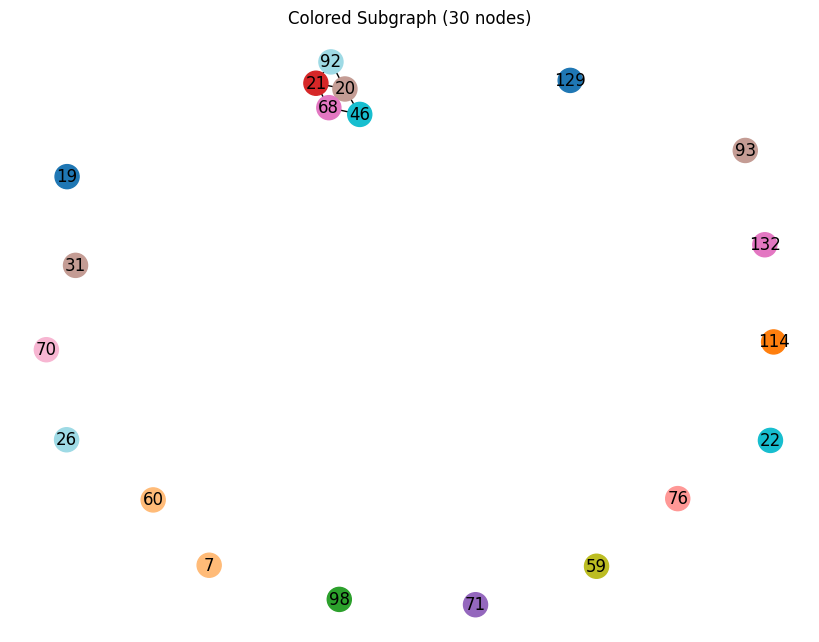

In [ ]:
# 5. Visualize a random subgraph of 20 nodes colored
nodes = random.sample(list(G.nodes()), 20)
subG = G.subgraph(nodes)
pos = nx.spring_layout(subG, seed=42)
colors = [best_coloring[node-1] for node in subG.nodes()]

plt.figure(figsize=(8,6))
nx.draw(subG, pos, with_labels=True, node_color=colors, cmap='tab20', node_size=300)
plt.title("Colored Subgraph (30 nodes)")
plt.show()


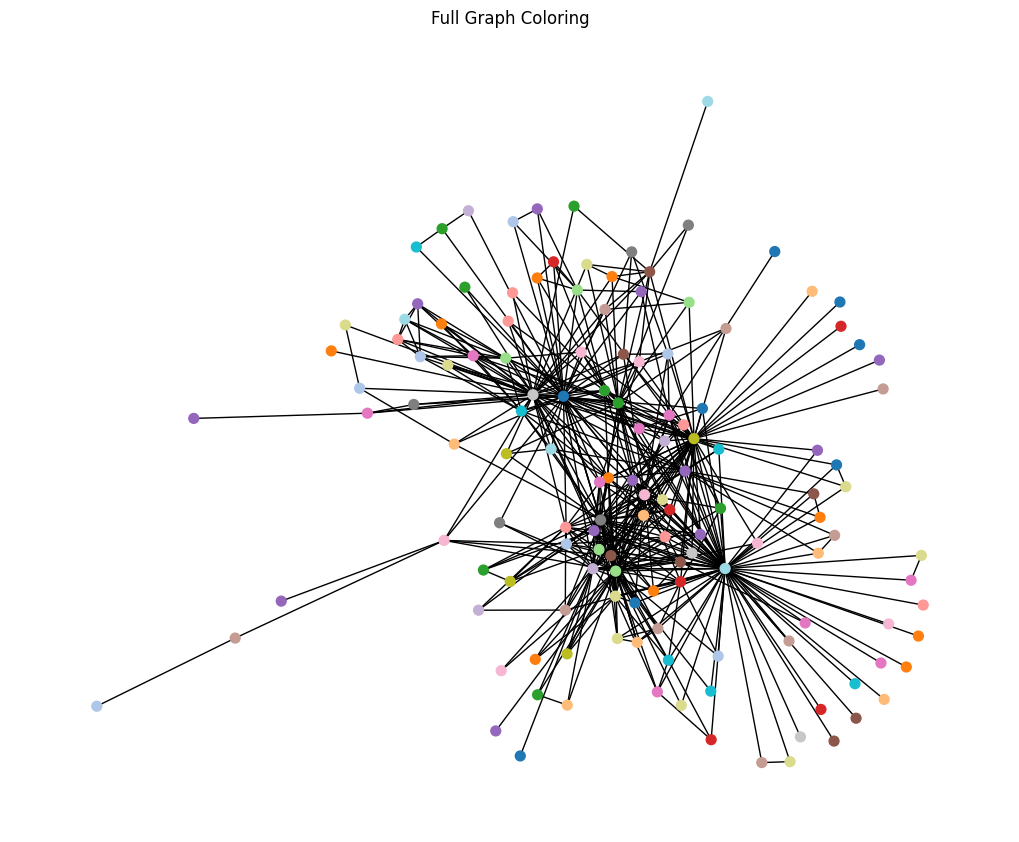

In [ ]:
# 6. Visualize the full graph coloring
pos_full = nx.spring_layout(G, seed=42)
colors_full = [best_coloring[node-1] for node in G.nodes()]

plt.figure(figsize=(10,8))
nx.draw(G, pos_full, with_labels=False, node_color=colors_full, cmap='tab20', node_size=50)
plt.title("Full Graph Coloring")
plt.show()
